In [2]:
import pandas as pd
dataset=pd.read_csv("sms_spam.csv")
dataset.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
dataset.shape


(5574, 2)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evolution
# 6. Improvement
# 7. website
# 8. Deploy

# 1. Data Cleaning

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
dataset.sample(5)

,type,text
724,ham,Ya even those cookies have jelly on them
4851,ham,Maybe you should find something else to do ins...
1433,ham,Thanks for ve lovely wisheds. You rock
1959,ham,"Lol ... Oh no babe, I wont be sliding into you..."
1182,ham,You flippin your shit yet?


In [10]:
# if have to rename the columns
# use
"""
dataset.rename(columns={"actual_name":"new_name"}, inplace=True)
"""

'\ndataset.rename(columns={"actual_name":"new_name"}, inplace=True)\n'

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
dataset['type']=encoder.fit_transform(dataset['type'])

In [17]:
dataset.head(5)

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
dataset.isnull().sum()

type    0
text    0
dtype: int64

In [20]:
# checking for duplicate values
dataset.duplicated().sum()

414

In [21]:
df = dataset.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5160, 2)

# 2. EDA

In [24]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['type'].value_counts()

0    4518
1     642
Name: type, dtype: int64

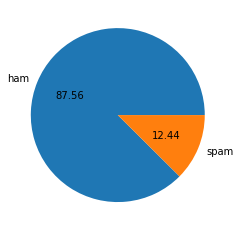

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [32]:
# Data is imbalanced

In [33]:
import nltk

In [50]:
!pip install punkit

ERROR: Could not find a version that satisfies the requirement punkit
ERROR: No matching distribution found for punkit


In [53]:
nltk.download('punkit')

[nltk_data] Error loading punkit: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [54]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [37]:
df['num_char']=df['text'].apply(len) # no. of char in every message

<ipython-input-37-daffd193ee4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len) # no. of char in every message


In [39]:
df.sample()

,type,text,num_char
3771,0,Love it! The girls at the office may wonder wh...,75


In [52]:
# num of words  .... need to download nltk
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\anxua/nltk_data'
    - 'C:\\Users\\anxua\\anaconda3\\nltk_data'
    - 'C:\\Users\\anxua\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\anxua\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\anxua\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [41]:
df.sample()

,type,text,num_char
5212,0,Dai i downloaded but there is only exe file wh...,91


In [46]:
# num of sentences  .... need to download nltk
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\anxua/nltk_data'
    - 'C:\\Users\\anxua\\anaconda3\\nltk_data'
    - 'C:\\Users\\anxua\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\anxua\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\anxua\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [44]:
!pip install nltk

In [45]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
!